https://www.kaggle.com/lampubhutia/timeseries-modelling-predicting-traffic-growth

## Bullet Train

on this article, there will be data "Hacking" on extracting hidden information on the data to get this raw data become more informative. Bullet Train need Investment so that the business can operate. usually it might require forecasted data in order to help the venture on making decisions to convince all the investor. 

### Hypotheis Generation 

it is done before having a look at the data to avoid any bias as the result data observation. 

1. there will be increase in traffic as years pass by since the population  number will keep on grow by the time. 
2. traffic will be high on May-October since touris will more likely  to visit during this window of time. 
3. traffic on weekdays will be more as compare to the weekend or holidays. since people will go to office , doing any kind of interaction for business 
purpose while on the other hand people tend to stay longer at home at weekends
4. traffic at peak hours will be higher than other time of the day

#### importing the library

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats,integrate
from sklearn.model_selection import train_test_split 
from sklearn  import metrics
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [7]:
# train = pd.read_csv('Train.csv')
# test= pd.read_csv('Test.csv')

In [8]:
### copy the original of the dataset 
train_original = train.copy()
test_original= test.copy()

In [11]:
print(test.shape), print(train.shape)

(5112, 2)
(18288, 3)


(None, None)

In [13]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        5112 non-null   int64 
 1   Datetime  5112 non-null   object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


(None, None)

so now we are deailing with data with no null data. it means we dont have to do any null handling method 

### feature extraction 

In [23]:
import datetime
train['Datetime'] =  pd.to_datetime(train['Datetime'],format= '%d-%m-%Y %H:%M',infer_datetime_format=True)
test['Datetime'] = pd.to_datetime(train['Datetime'],format= '%d-%m-%Y %H:%M',infer_datetime_format=True)
train_original['Datetime']  = pd.to_datetime(train['Datetime'],format= '%d-%m-%Y %H:%M',infer_datetime_format=True)
test_original['Datetime'] = pd.to_datetime(train['Datetime'],format= '%d-%m-%Y %H:%M',infer_datetime_format=True)


#### get year, month , day and hour information 

In [36]:
for data in (train,test,test_original,train_original):
    data['year'] = data['Datetime'].dt.year
    data['month'] = data['Datetime'].dt.month
    data['day'] = data['Datetime'].dt.day
    data['hour'] = data['Datetime'].dt.hour

the hypothesis was drawn that the traffic will be morelikely to have higher number on weekdays,  hence we need to separate the data between weeekdays and weekend

In [42]:
train['dayofweek']=train['Datetime'].dt.dayofweek
temp = train['Datetime']


In [43]:
def get_weekday(val ):
    if val>4:
        return 1 
    else:
        return 0 

In [46]:
train['weekend']=train['dayofweek'].apply(get_weekday)

In [47]:
train

,ID,Datetime,Count,year,month,day,hour,dayofweek,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3,0
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3,0
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3,0
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3,0


In [48]:
from pandas.plotting import register_matplotlib_converters 
train.index= train['Datetime']

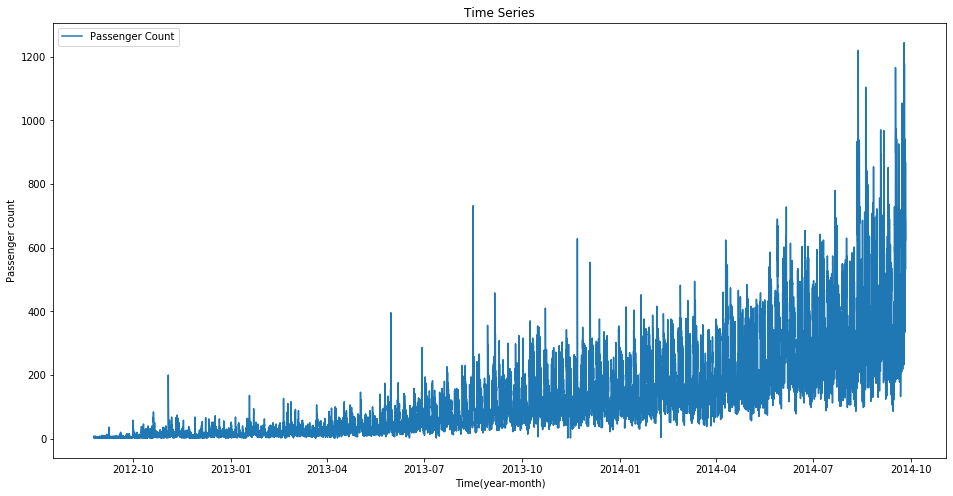

In [52]:
df = train.drop('ID',axis=1)
ts= df['Count']
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')


## Recalling the early hypothesis that was drawn
1. Traffic will incease as the year pass by 
2. traffic will be higher from may-October
3. traffic on weekdays will be higher 
4. traffic during peaek hour will be higher

#### Exploratory data analysis 
let's try to verify the previous hypothesis using the data

#### 1. traffic will increase as the years pass by so we need to take alook at yearly passenger count

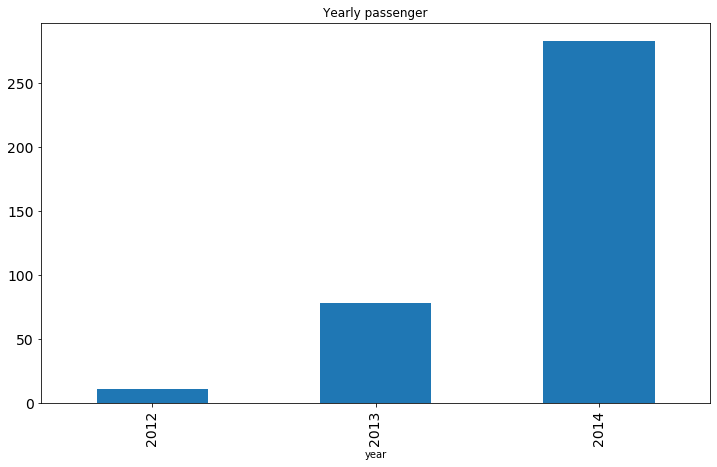

In [64]:
train.groupby('year')['Count'].mean().plot.bar(fontsize= 14, figsize = (12,7)
                                               , title='Yearly passenger' )

#### 2nd hypothesis. from may to october the number will bi higher. 

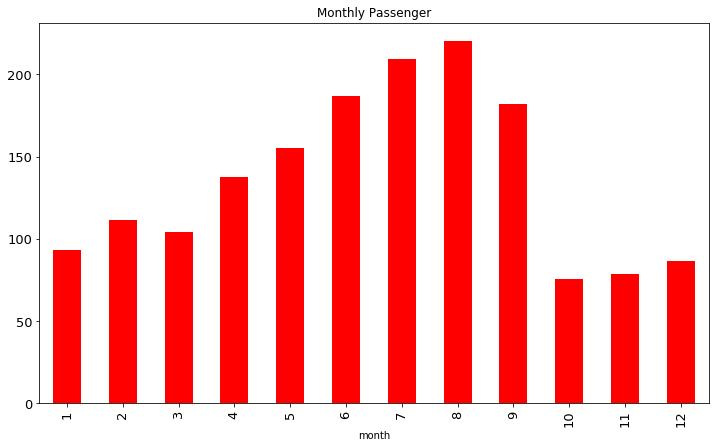

In [89]:
train.groupby('month')['Count'].mean().plot.bar(fontsize= 13, figsize=(12,7), 
                                                color='r', title= 'Monthly Passenger')

 #### we need to check on the monthly trend each year to see why the data is low

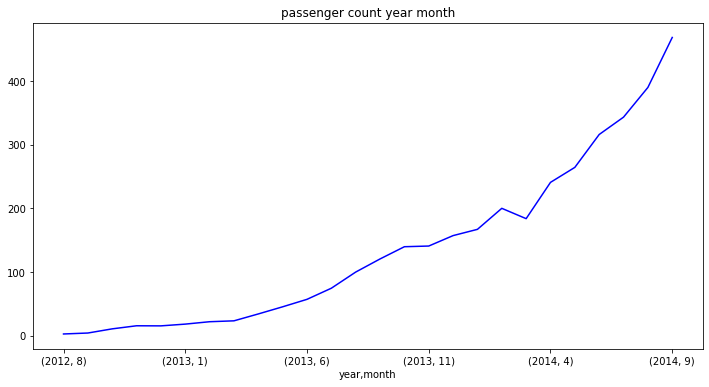

In [95]:
train.groupby(['year','month']).mean()['Count'].plot(color='b',
                                                    title= 'passenger count year month',
                                                    figsize= (12,6))

It is visible that the month Oct, Nov and Dec having a very low mean value in year 2012 and the values for theses months are not present in year 2014.

Since there is an increasing trend in our time series, the mean value for rest of the months will be more because of their larger passenger counts in year 2014. Therefore, we will get smaller value for these 3 months.

In the above bar plot we can see an increasing trend in monthly passenger count and the growth is approximately exponentia

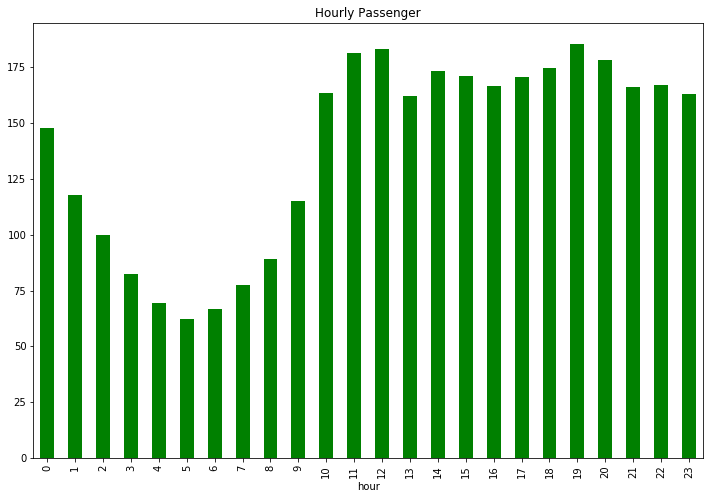

In [99]:
train.groupby('hour').mean()['Count'].plot.bar(figsize= (12,8),
                                              color= 'g',
                                              title= 'Hourly Passenger')

It can be inferred that the peak traffic in the evening is at 7 PM. Then a decreasing trend is noticed till 5 AM. After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

#### 3rd Hypothesis that the weekdays more than the weekend

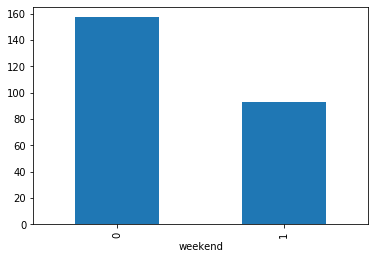

In [101]:
train.groupby('weekend').mean()['Count'].plot.bar()

### check the data based on the day of the week

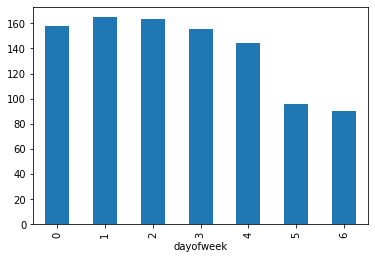

In [107]:
train.groupby('dayofweek').mean()['Count'].plot.bar()

## Basic modeling techniques

#### first we need to drop the ID columns since it has no impact our model later

In [114]:
# train= train.drop(columns=['ID'])
pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 

Datetime
2012-08-25 00:00:00   2012-08-25 00:00:00
2012-08-25 01:00:00   2012-08-25 01:00:00
2012-08-25 02:00:00   2012-08-25 02:00:00
2012-08-25 03:00:00   2012-08-25 03:00:00
2012-08-25 04:00:00   2012-08-25 04:00:00
                              ...        
2014-09-25 19:00:00   2014-09-25 19:00:00
2014-09-25 20:00:00   2014-09-25 20:00:00
2014-09-25 21:00:00   2014-09-25 21:00:00
2014-09-25 22:00:00   2014-09-25 22:00:00
2014-09-25 23:00:00   2014-09-25 23:00:00
Name: Datetime, Length: 18288, dtype: datetime64[ns]

### to check the noise reduction effect on time series data, we might need to resample the data hourly , daily , weekly and monhtly 

In [122]:
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()

#### subplot on one figure

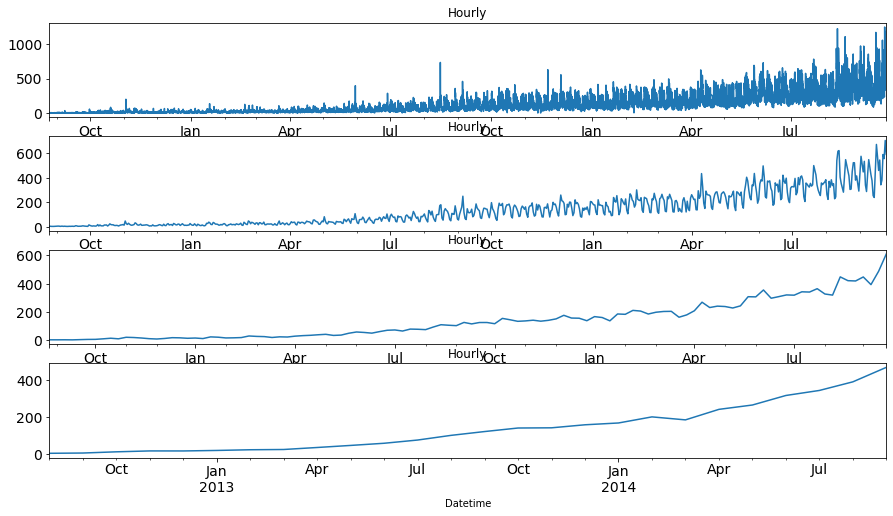

In [133]:
fig,axs= plt.subplots(4,1)
hourly['Count'].plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily['Count'].plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[1]) 
weekly['Count'].plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[2]) 
monthly["Count"].plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[3]) 

From the graph, it is visible that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

#### so now we working on the daily index data

In [140]:
# test.set_index('Datetime')
# or 
test.index= pd.to_datetime(test['Datetime'], format='%d-%m-%Y %H:%M') 

In [143]:
test =test.resample('D').mean()

In [166]:
train = train.resample('D').mean()


#### splitting the data for training and validation 

In [154]:
Train=  train['2012-08-25':'2014-06-24']
valid = train['2014-06-24':'2014-09-25']

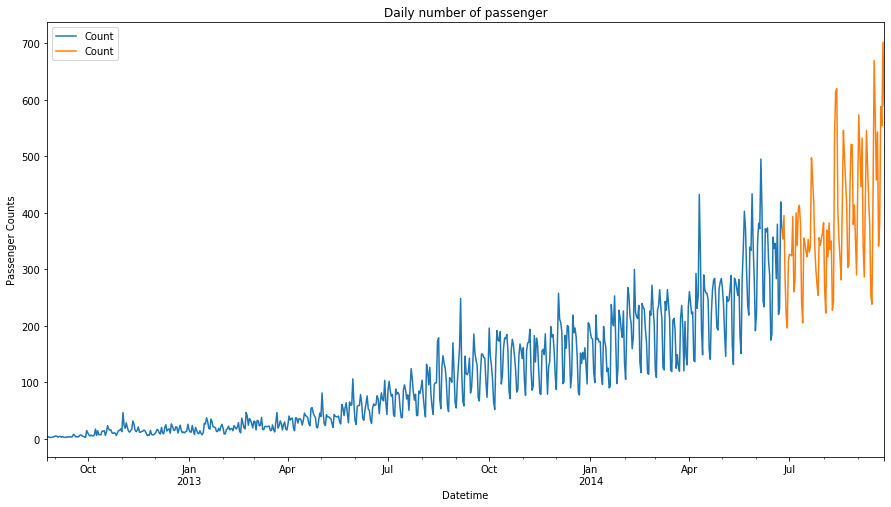

In [164]:
Train['Count'].plot(figsize= (15,8))
valid['Count'].plot(figsize= (15,8))
plt.title('Daily number of passenger')
plt.xlabel('Datetime')
plt.ylabel('Passenger Counts')
plt.legend(loc='upper left')
plt.show()

# predicting using ARIMA

#### get trend, seasonality and Noise

In [183]:
y = train['2014-01':'2014-09']['Count']


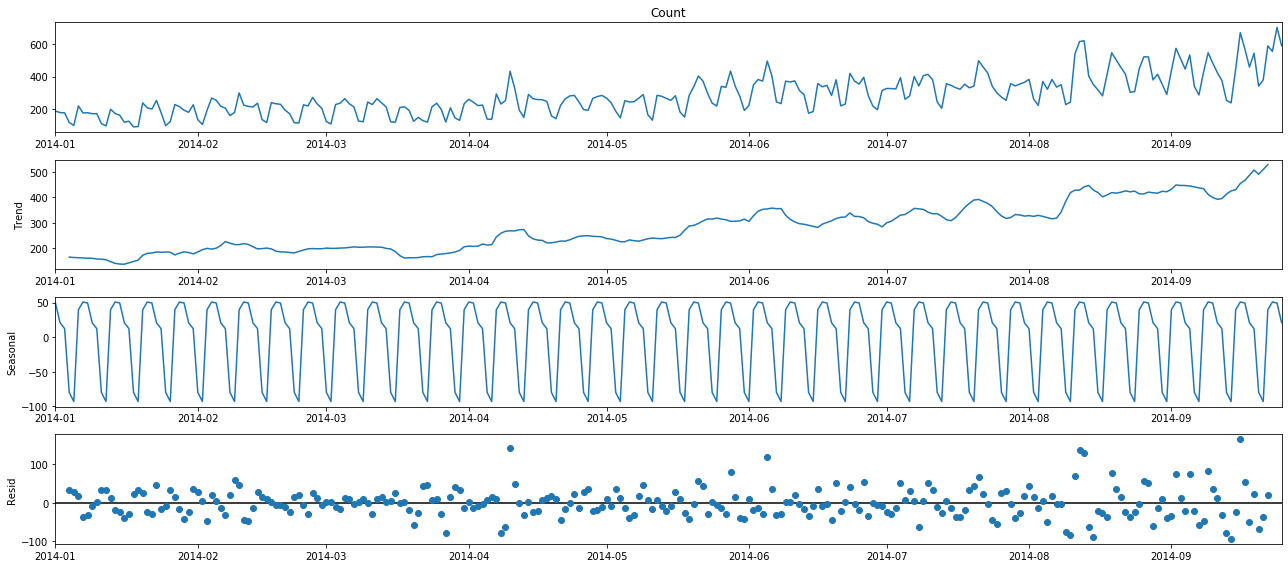

In [187]:
# from pylab import rcParams
# import statsmodels.api as sm
import itertools 
rcParams['figure.figsize'] = 18,8
decomposition= sm.tsa.seasonal_decompose(y, model='additive')
fig= decomposition.plot()
plt.show()

In [188]:
p=d=q=range(0,2)
pdq= list(itertools.product(p,d,q))
seasonal_pdq= [(x[0], x[1], x[2],7) for x in list(itertools.product(p,d,q))]

In [194]:
for param in pdq :
    listAIC= []
    for param_seasonal in seasonal_pdq:
        try: 
            mod = sm.tsa.statespace.SARIMAX(y,order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results= mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

        except:
            continue
#         list.append((results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 7)12 - AIC:3819.0820965283924
ARIMA(0, 0, 0)x(0, 0, 1, 7)12 - AIC:3477.465160652622
ARIMA(0, 0, 0)x(0, 1, 0, 7)12 - AIC:2916.0384170546695
ARIMA(0, 0, 0)x(0, 1, 1, 7)12 - AIC:2776.961348949836
ARIMA(0, 0, 0)x(1, 0, 0, 7)12 - AIC:2926.950517996515


D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 7)12 - AIC:2785.867840154686
ARIMA(0, 0, 0)x(1, 1, 0, 7)12 - AIC:2797.3948909145697
ARIMA(0, 0, 0)x(1, 1, 1, 7)12 - AIC:2777.488714698293
ARIMA(0, 0, 1)x(0, 0, 0, 7)12 - AIC:3501.3399273464174
ARIMA(0, 0, 1)x(0, 0, 1, 7)12 - AIC:3239.330916583228
ARIMA(0, 0, 1)x(0, 1, 0, 7)12 - AIC:2839.607519876012
ARIMA(0, 0, 1)x(0, 1, 1, 7)12 - AIC:2683.620250520472
ARIMA(0, 0, 1)x(1, 0, 0, 7)12 - AIC:2861.770014784189
ARIMA(0, 0, 1)x(1, 0, 1, 7)12 - AIC:2708.862337019161
ARIMA(0, 0, 1)x(1, 1, 0, 7)12 - AIC:2725.318297776127
ARIMA(0, 0, 1)x(1, 1, 1, 7)12 - AIC:2682.7866702186734
ARIMA(0, 1, 0)x(0, 0, 0, 7)12 - AIC:3086.444529326007
ARIMA(0, 1, 0)x(0, 0, 1, 7)12 - AIC:2934.1417401805456
ARIMA(0, 1, 0)x(0, 1, 0, 7)12 - AIC:2898.21033048101
ARIMA(0, 1, 0)x(0, 1, 1, 7)12 - AIC:2699.841460971873
ARIMA(0, 1, 0)x(1, 0, 0, 7)12 - AIC:2870.800713852384
ARIMA(0, 1, 0)x(1, 0, 1, 7)12 - AIC:2771.2983148964177
ARIMA(0, 1, 0)x(1, 1, 0, 7)12 - AIC:2768.806801689902
ARIMA(0, 1, 0)x(1, 1, 1,

#### variable result 

In [ ]:
'ARIMA(1, 1, 1)x(1, 1, 1, 7)'

#### fitting the ARIMA Model

In [195]:
model= sm.tsa.statespace.SARIMAX(y,
                                order=(1,1,1),
                                seasonal_order=(1,1,1,7),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False
                                )
results = model.fit()

In [196]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Count   No. Observations:                  268
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1313.879
Date:                           Tue, 22 Dec 2020   AIC                           2637.757
Time:                                   09:22:09   BIC                           2655.385
Sample:                               01-01-2014   HQIC                          2644.851
                                    - 09-25-2014                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5125      0.048     10.760      0.000       0.419       0.606
ma.L1         -0.9702      0.024    -39.975      0.000      -1.018      -0.923
ar.S.L7       -0.0126      0.066     -0.191      0.848      -0.142       0.116
ma.S.L7       -0.8202      0.037    -21.916      0.000      -0.894      -0.747
sigma2      2005.0041    103.077     19.452      0.000    1802.977    2207.031
===================================================================================
Ljung-Box (Q):                       36.76   Jarque-Bera (JB):               239.64
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               2.39   Skew:                             1.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

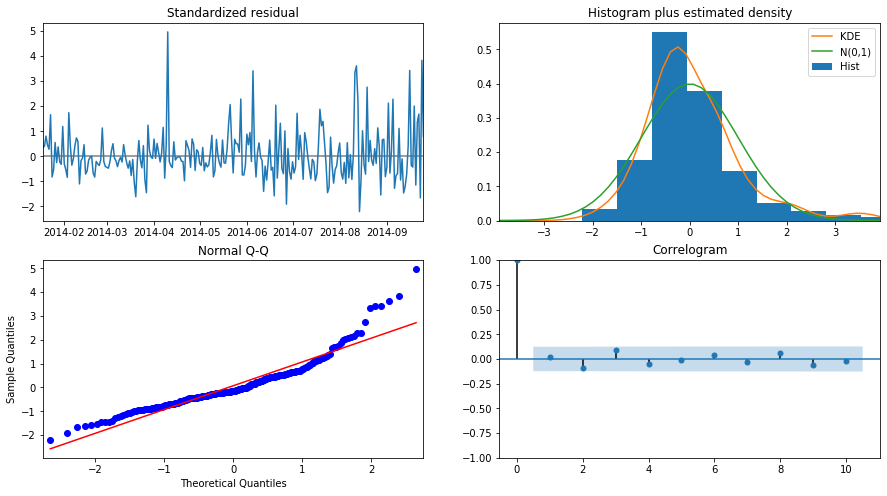

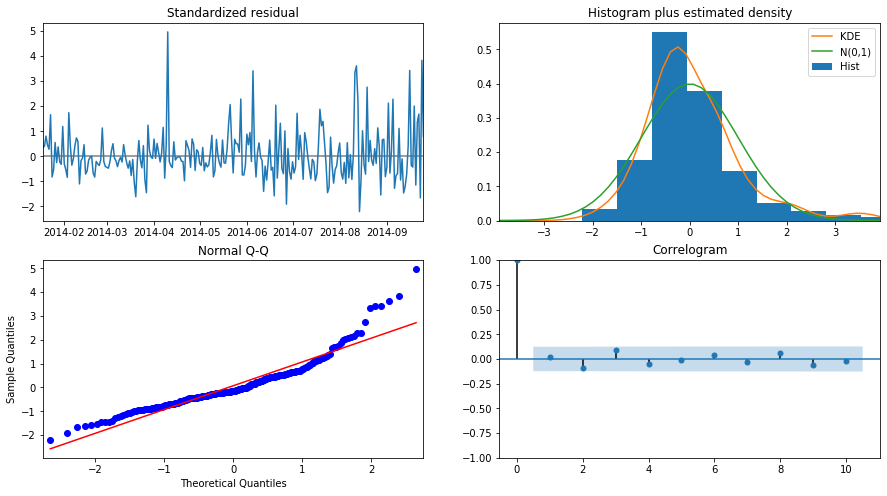

In [197]:
results.plot_diagnostics(figsize= (15,8))

### validating the forecasting

In [205]:
pred= results.get_prediction(start=  pd.to_datetime('2014-09-01'),dynamic=False)
pred_ci= pred.conf_int()

#### plotting the validation result 
#### along with the confident interval result

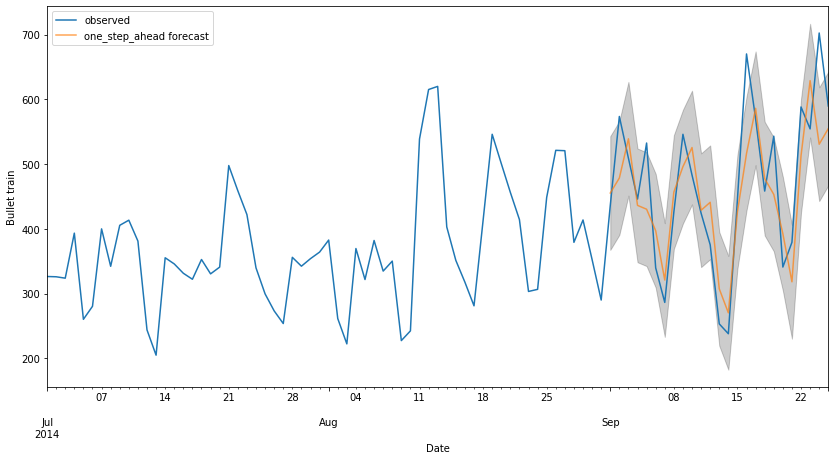

In [210]:
ax= y['2014-07':].plot(label= 'observed')
pred.predicted_mean.plot(ax=ax, label='one_step_ahead forecast',
                        alpha= .7, figsize= (14,7))
ax.fill_between(pred_ci.index, 
               pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k'
                ,alpha= .2)

ax.set_xlabel('Date')
ax.set_ylabel('Bullet train')
plt.legend()
plt.show()

from the forecast above we see only slight different betweeen validation and real data

In [211]:
y_forecast = pred.predicted_mean
y_truth= y['2014-07':]

In [215]:
mse= ((y_forecast-y_truth)**2).mean()
mse= round(mse,2)
print('the mean squared error of our forecast is {}'.format(mse))

the mean squared error of our forecast is 4792.69


#### producing forecast 

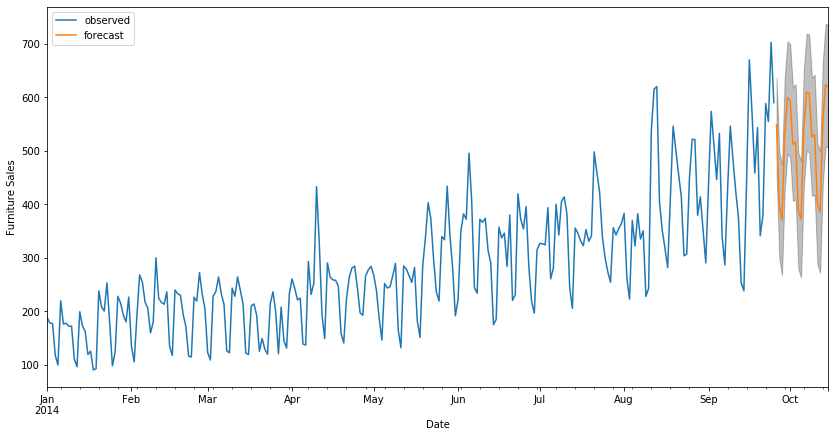

In [217]:
pred_uc= results.get_forecast(steps= 20)
pred_ci= pred_uc.conf_int()


ax= y.plot(label= 'observed', figsize = (14,7))
pred_uc.predicted_mean.plot(ax=ax,label='forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

#### save the forecast as the CSV

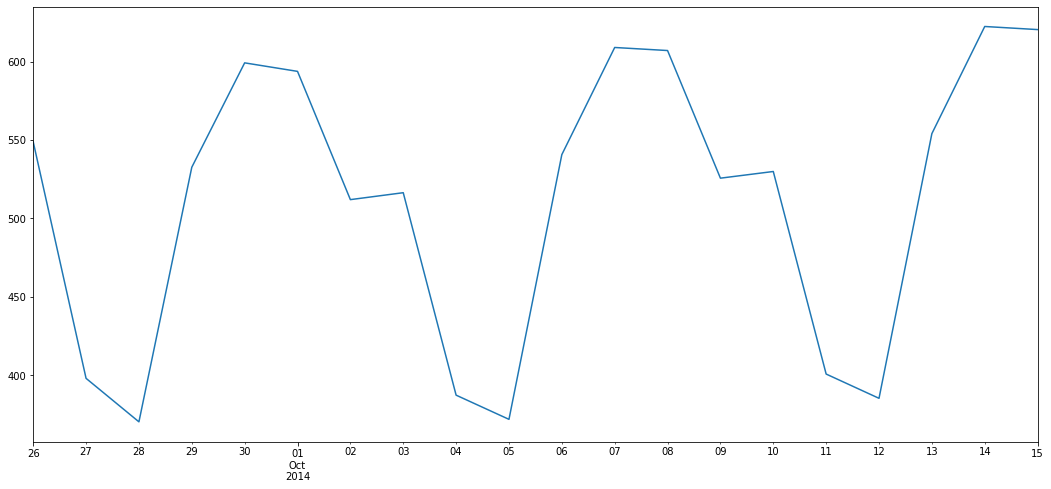

In [225]:
forecast = pred_uc.predicted_mean
forecast.plot()